## Data Science and Public Policy:
### Are facial recognition algorithms biased?


- The packages below provide tools for analyzing image data in Python:
    - ```libfacedetection``` was developed by Professor Shiqi Yu (https://github.com/ShiqiYu)
    - It's a CNN that was trained to detect faces in images.
- For more information, see: https://github.com/ShiqiYu/libfacedetection


- The FairFace dataset is described here: https://arxiv.org/pdf/1908.04913.pdf
It's one of the first datasets of faces that is balanced along racial categories


### Your goal: examine whether facial recognition algorithms are biased, as Joy Buolamwini   argues in the readings for week 11


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !ls drive/MyDrive/

'Colab Notebooks'   Colab_Notebooks   data   Project_folder


In [ ]:
# !cd drive/MyDrive/

In [ ]:
# !pwd

/content


In [9]:
import torch
print("CUDA is available" if torch.cuda.is_available() else "CUDA is not available")

CUDA is available


In [12]:
# !unzip '/content/train.zip' -d '/content/train'
# !unzip '/content/val_new.zip' -d '/content/val'
# !unzip '/content/test.zip' -d '/content/test'

Archive:  /content/test.zip
   creating: /content/test/test/
  inflating: /content/test/__MACOSX/._test  
  inflating: /content/test/test/6400.jpg  
  inflating: /content/test/__MACOSX/test/._6400.jpg  
  inflating: /content/test/test/10447.jpg  
  inflating: /content/test/__MACOSX/test/._10447.jpg  
  inflating: /content/test/test/1409.jpg  
  inflating: /content/test/__MACOSX/test/._1409.jpg  
  inflating: /content/test/test/9041.jpg  
  inflating: /content/test/__MACOSX/test/._9041.jpg  
  inflating: /content/test/test/4565.jpg  
  inflating: /content/test/__MACOSX/test/._4565.jpg  
  inflating: /content/test/test/4203.jpg  
  inflating: /content/test/__MACOSX/test/._4203.jpg  
  inflating: /content/test/test/77.jpg  
  inflating: /content/test/__MACOSX/test/._77.jpg  
  inflating: /content/test/test/837.jpg  
  inflating: /content/test/__MACOSX/test/._837.jpg  
  inflating: /content/test/test/3544.jpg  
  inflating: /content/test/__MACOSX/test/._3544.jpg  
  inflating: /content/tes

In [13]:
## Option 1:
## Use the CNN that Professor Yu developed to examine whether its ability to detect faces
## varies by the demographic characteristics of the person (race, gender, age)

## Below is some code that can get you started with option 1:

In [14]:
!cd /content/

In [15]:
!ls

data  sample_data  test  test.zip  train  train.zip  val  val_new.zip


In [ ]:
# !pip install face_detection

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 799.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 

In [17]:
import os
from sklearn.metrics import accuracy_score
import cv2
import random
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw  # Import ImageDraw
# import face_detection

import os
import pandas as pd

# Set working directory (replace with your own path)
Path = '/content/'

# Assuming the CSV files are in the 'data/train' directory within the path provided
train_path = os.path.join(Path, "data")
val_path = os.path.join(Path, "data")

# Demographic characteristics of people in the images:
fairface_label_train = pd.read_csv(os.path.join(train_path, "fairface_label_train.csv"))
fairface_label_val = pd.read_csv(os.path.join(val_path, "fairface_label_val_new.csv"))

# Paths to image files:
train_images = os.listdir(os.path.join(Path, "data/train"))
val_images = os.listdir(os.path.join(Path, "data/val"))

# print(face_detection.available_detectors)
# detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)
# BGR to RGB
im = cv2.imread("data/train/1.jpg")[:, :, ::-1]

##

In [4]:
## Option 2:
## Train your own CNN to detect faces using the FairFace dataset and evaluate whether your
## model's performance varies by the demographic characteristics of the person


## `label__train`

In [18]:
# number of train_label
train_label = pd.read_csv(Path + 'data/fairface_label_train.csv')
train_label.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [19]:
# Specify the path of the image folder
folder_path = Path + "data/train"

# Define the allowed image file extensions
allowed_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Initialize the image counter
count = 0

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file extension is an image format
    if os.path.splitext(filename)[1].lower() in allowed_extensions:
        count += 1

# Print the number of images
print(f"There are {count} images in the folder.")

There are 86744 images in the folder.


### General Description on label_train

- In the `age` column, the most common age group "20-29" occurs a total of 25598 times.
- In the `gender` column, "Male" is the most common gender, occurring 45,986 times.
- In the `race` column, "White" is the most common race, appearing 16527 times.
- In the `service_test` column, "False" appears the most, 46492 times in total.

In [20]:
# Get descriptive statistics
description = fairface_label_train.describe()
print(description)


               file    age gender   race service_test
count         86744  86744  86744  86744        86744
unique        86744      9      2      7            2
top     train/1.jpg  20-29   Male  White        False
freq              1  25598  45986  16527        46492


### No missing values

In [21]:
# Check for missing values
missing_values = fairface_label_train.isnull().sum()
print(missing_values)

file            0
age             0
gender          0
race            0
service_test    0
dtype: int64


### 9 age group

In [22]:
# Get the counts of unique values for a specific column
age_label_counts = fairface_label_train['age'].value_counts()
age_label_counts

20-29           25598
30-39           19250
40-49           10744
3-9             10408
10-19            9103
50-59            6228
60-69            2779
0-2              1792
more than 70      842
Name: age, dtype: int64

### 2 gender group

In [23]:
# Get the counts of unique values for a specific column
gender_label_counts = fairface_label_train['gender'].value_counts()
gender_label_counts


Male      45986
Female    40758
Name: gender, dtype: int64

### 7 race group

In [24]:
# Get the counts of unique values for a specific column
race_label_counts = fairface_label_train['race'].value_counts()
race_label_counts

White              16527
Latino_Hispanic    13367
Indian             12319
East Asian         12287
Black              12233
Southeast Asian    10795
Middle Eastern      9216
Name: race, dtype: int64

### 2 Service group

In [25]:
# Get the counts of unique values for a specific column
service_test_label_counts = fairface_label_train['service_test'].value_counts()
service_test_label_counts

False    46492
True     40252
Name: service_test, dtype: int64

## `label_val`

In [26]:
# number of val_label
val_label = pd.read_csv(Path + 'data/fairface_label_val_new.csv', index_col= 0)
val_label.head()

,file,age,gender,race,service_test
4352,val/4353.jpg,10-19,Female,Indian,False
4894,val/4895.jpg,3-9,Male,Southeast Asian,False
3015,val/3016.jpg,40-49,Female,Indian,False
9262,val/9263.jpg,3-9,Female,Black,True
9172,val/9173.jpg,20-29,Male,Southeast Asian,False


In [27]:
# Specify the path of the image folder
folder_path = Path + "data/val"

# Define the allowed image file extensions
allowed_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# Initialize the image counter
count = 0

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file extension is an image format
    if os.path.splitext(filename)[1].lower() in allowed_extensions:
        count += 1

# Print the number of images
print(f"There are {count} images in the folder.")

There are 8763 images in the folder.


## Shape of image

In [28]:
# Replace with the correct path to your image file
image_path = 'data/train/1.jpg'

# Check if the file exists
if os.path.exists(image_path):
    # read the image
    image = cv2.imread(image_path)

    # If the image loaded correctly, it will not be None
    if image is not None:
        height, width, channels = image.shape
        print("width:", width)
        print("height:", height)
        print("channels:", channels)
    else:
        print("Image loaded but has no 'shape' attribute. It may not be an image file.")
else:
    print("The file specified does not exist at the path provided.")

width: 224
height: 224
channels: 3


### Import Model Pacakges

In [29]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# for creating test labels
import csv
import os
import shutil

In [30]:
# Visualization libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [31]:
# for more specific training
import numpy as np
from tqdm import tqdm

## ResNet

In [32]:
input_shape = (224, 224, 3)  # Input shape of the image

# number of class on each label
num_gender_classes = 2  # gender
num_age_classes = 9     # age
num_race_classes = 7    # race
num_service_test_classes = 2 # service_test

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image

class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.stride = stride
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Sequential()

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.make_layer(block, 512, num_blocks[3], stride=2)
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

class TaskHeads(nn.Module):
    def __init__(self, in_features, num_classes):
        super(TaskHeads, self).__init__()
        self.fc1 = nn.Linear(in_features, 256)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CustomModel(nn.Module):
    def __init__(self, num_gender_classes, num_age_classes, num_race_classes, num_service_test_classes):
        super(CustomModel, self).__init__()
        self.resnet = ResNet(BasicBlock, [2, 2, 2, 2], num_classes=512)
        self.gender_output = TaskHeads(512, num_gender_classes)
        self.age_output = TaskHeads(512, num_age_classes)
        self.race_output = TaskHeads(512, num_race_classes)
        self.service_output = TaskHeads(512, num_service_test_classes)

    def forward(self, x):
        x = self.resnet(x)
        gender = self.gender_output(x)
        age = self.age_output(x)
        race = self.race_output(x)
        service = self.service_output(x)
        return gender, age, race, service

In [34]:
class CustomDataset(Dataset):
    def __init__(self, dataframe, directory, transform=None):
        self.dataframe = dataframe
        self.directory = directory
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['file']
        img_path = f"{self.directory}/{img_name}"
        image = Image.open(img_path).convert("RGB")
        labels = torch.tensor(self.dataframe.iloc[idx][['gender', 'age', 'race', 'service_test']].tolist(), dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        return image, labels

data_transforms = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [35]:
age_to_num = {x : i for i, x in enumerate(set(train_label['age']))}
gender_to_num = {x : i for i, x in enumerate(set(train_label['gender']))}
race_to_num = {x : i for i, x in enumerate(set(train_label['race']))}
service_to_num = {x : i for i, x in enumerate(set(train_label['service_test']))}

In [36]:
num_to_age = {i : x for x, i in age_to_num.items()}
num_to_gender = {i : x for x, i in gender_to_num.items()}
num_to_race = {i : x for x, i in race_to_num.items()}
num_to_service = {i : x for x, i in service_to_num.items()}

In [37]:
processed_train_label = train_label.copy()
processed_train_label['age'] = processed_train_label['age'].apply(lambda x: age_to_num[x])
processed_train_label['gender'] = processed_train_label['gender'].apply(lambda x: gender_to_num[x])
processed_train_label['race'] = processed_train_label['race'].apply(lambda x: race_to_num[x])
processed_train_label['service_test'] = processed_train_label['service_test'].apply(lambda x: service_to_num[x])
processed_train_label

,file,age,gender,race,service_test
0,train/1.jpg,6,1,0,1
1,train/2.jpg,3,0,1,0
2,train/3.jpg,1,0,5,0
3,train/4.jpg,7,0,1,1
4,train/5.jpg,7,0,1,1
...,...,...,...,...,...
86739,train/86740.jpg,7,1,1,1
86740,train/86741.jpg,5,1,1,1
86741,train/86742.jpg,2,0,1,1
86742,train/86743.jpg,5,0,5,1


In [38]:
processed_val_label = val_label.copy()
processed_val_label['age'] = processed_val_label['age'].apply(lambda x: age_to_num[x])
processed_val_label['gender'] = processed_val_label['gender'].apply(lambda x: gender_to_num[x])
processed_val_label['race'] = processed_val_label['race'].apply(lambda x: race_to_num[x])
processed_val_label['service_test'] = processed_val_label['service_test'].apply(lambda x: service_to_num[x])

In [39]:
processed_val_label

,file,age,gender,race,service_test
4352,val/4353.jpg,5,0,1,0
4894,val/4895.jpg,1,1,3,0
3015,val/3016.jpg,0,0,1,0
9262,val/9263.jpg,1,0,5,1
9172,val/9173.jpg,7,1,3,0
...,...,...,...,...,...
5734,val/5735.jpg,7,0,1,1
5191,val/5192.jpg,7,1,2,0
5390,val/5391.jpg,7,1,0,1
860,val/861.jpg,0,0,2,0


In [40]:
# number of test_label
test_label = pd.read_csv(Path + 'data/fairface_label_test.csv', index_col=0)
test_label['file'] = test_label['file'].apply(lambda x: 'test' + x[3:])
test_label.head()

,file,age,gender,race,service_test
5412,test/5413.jpg,10-19,Male,Latino_Hispanic,True
900,test/901.jpg,30-39,Female,Middle Eastern,True
2405,test/2406.jpg,20-29,Female,Latino_Hispanic,True
2174,test/2175.jpg,3-9,Female,East Asian,True
7698,test/7699.jpg,30-39,Female,Latino_Hispanic,False


In [41]:
processed_test_label = test_label.copy()
processed_test_label['age'] = processed_test_label['age'].apply(lambda x: age_to_num[x])
processed_test_label['gender'] = processed_test_label['gender'].apply(lambda x: gender_to_num[x])
processed_test_label['race'] = processed_test_label['race'].apply(lambda x: race_to_num[x])
processed_test_label['service_test'] = processed_test_label['service_test'].apply(lambda x: service_to_num[x])

In [42]:
# Load and prepare data
train_dataset = CustomDataset(dataframe=processed_train_label, directory= Path + 'data', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataset = CustomDataset(dataframe=processed_val_label, directory= Path + 'data', transform=data_transforms)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_dataset = CustomDataset(dataframe=processed_test_label, directory= Path +'data', transform=data_transforms)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


### Multi-label classification may consider the correlation between labels when designing the model. Sometimes different labels are independent of each other, and sometimes they may be intrinsically related.
- 标签相关性测试

### Train Model

#### Multi-Task

In [43]:
from tqdm import tqdm

model = CustomModel(num_gender_classes, num_age_classes, num_race_classes, num_service_test_classes).to('cuda')

# Define the loss function
criterion = {
    'gender_output': nn.CrossEntropyLoss(),
    'age_output': nn.CrossEntropyLoss(),
    'race_output': nn.CrossEntropyLoss(),
    'service_output': nn.CrossEntropyLoss()
}

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Initialize lists to store training and validation accuracies
train_accuracy_history = {'gender': [], 'age': [], 'race': [], 'service': []}
val_accuracy_history = {'gender': [], 'age': [], 'race': [], 'service': []}
min_val_loss = 1e8

# Train the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    gender_correct, age_correct, race_correct, service_correct = 0, 0, 0, 0
    for images, labels in tqdm(train_loader):
        images = images.to('cuda')
        labels = labels.to('cuda')
        optimizer.zero_grad()
        gender_output, age_output, race_output, service_output = model(images)
        loss = criterion['gender_output'](gender_output, labels[:, 0]) + \
               criterion['age_output'](age_output, labels[:, 1]) + \
               criterion['race_output'](race_output, labels[:, 2]) + \
               criterion['service_output'](service_output, labels[:, 3])
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        gender = gender_output.argmax(dim=-1)
        age = age_output.argmax(dim=-1)
        race = race_output.argmax(dim=-1)
        service = service_output.argmax(dim=-1)
        gender_correct += (gender == labels[:, 0]).sum()
        age_correct += (age == labels[:, 1]).sum()
        race_correct += (race == labels[:, 2]).sum()
        service_correct += (service == labels[:, 3]).sum()

    epoch_loss = running_loss / len(train_loader.dataset)

    gender_train_accuracy = gender_correct / len(train_loader.dataset)
    age_train_accuracy = age_correct / len(train_loader.dataset)
    race_train_accuracy = race_correct / len(train_loader.dataset)
    service_train_accuracy = service_correct / len(train_loader.dataset)

    train_accuracy_history['gender'].append(gender_train_accuracy.item())
    train_accuracy_history['age'].append(age_train_accuracy.item())
    train_accuracy_history['race'].append(race_train_accuracy.item())
    train_accuracy_history['service'].append(service_train_accuracy.item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        val_running_loss = 0.0
        gender_correct, age_correct, race_correct, service_correct = 0, 0, 0, 0
        for val_images, val_labels in tqdm(val_loader):
            val_images = val_images.to('cuda')
            val_labels = val_labels.to('cuda')
            val_gender_output, val_age_output, val_race_output, val_service_output = model(val_images)
            val_loss = criterion['gender_output'](val_gender_output, val_labels[:, 0]) + \
                       criterion['age_output'](val_age_output, val_labels[:, 1]) + \
                       criterion['race_output'](val_race_output, val_labels[:, 2]) + \
                       criterion['service_output'](val_service_output, val_labels[:, 3])
            val_running_loss += val_loss.item() * val_images.size(0)
            val_gender = val_gender_output.argmax(dim=-1)
            val_age = val_age_output.argmax(dim=-1)
            val_race = val_race_output.argmax(dim=-1)
            val_service = val_service_output.argmax(dim=-1)
            gender_correct += (val_gender == val_labels[:, 0]).sum()
            age_correct += (val_age == val_labels[:, 1]).sum()
            race_correct += (val_race == val_labels[:, 2]).sum()
            service_correct += (val_service == val_labels[:, 3]).sum()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)

    gender_val_accuracy = gender_correct / len(val_loader.dataset)
    age_val_accuracy = age_correct / len(val_loader.dataset)
    race_val_accuracy = race_correct / len(val_loader.dataset)
    service_val_accuracy = service_correct / len(val_loader.dataset)

    val_accuracy_history['gender'].append(gender_val_accuracy.item())
    val_accuracy_history['age'].append(age_val_accuracy.item())
    val_accuracy_history['race'].append(race_val_accuracy.item())
    val_accuracy_history['service'].append(service_val_accuracy.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}, "
          f"training gender acc: {gender_train_accuracy:.4f}, training age acc: {age_train_accuracy:.4f}, training race acc: {race_train_accuracy:.4f}, "
          f"training service acc: {service_train_accuracy:.4f} "
          f"val gender acc: {gender_val_accuracy:.4f}, val age acc: {age_val_accuracy:.4f}, val race acc: {race_val_accuracy:.4f}, "
          f"val service acc: {service_val_accuracy:.4f}")

    if val_epoch_loss < min_val_loss:
        min_val_loss = val_epoch_loss
        torch.save(model.state_dict(), 'multi-task.ckpt')

100%|██████████| 548/548 [00:18<00:00, 29.21it/s]


Epoch 1/20, Loss: 4.6665, Val Loss: 4.1457, training gender acc: 0.6893, training age acc: 0.3353, training race acc: 0.3242, training service acc: 0.5363 val gender acc: 0.7974, val age acc: 0.3774, val race acc: 0.4310, val service acc: 0.5405


100%|██████████| 548/548 [00:18<00:00, 29.52it/s]


Epoch 2/20, Loss: 3.7555, Val Loss: 3.6044, training gender acc: 0.8172, training age acc: 0.4365, training race acc: 0.4827, training service acc: 0.5594 val gender acc: 0.8213, val age acc: 0.4541, val race acc: 0.5173, val service acc: 0.5572


100%|██████████| 548/548 [00:18<00:00, 30.44it/s]


Epoch 3/20, Loss: 3.3716, Val Loss: 3.3351, training gender acc: 0.8559, training age acc: 0.4843, training race acc: 0.5492, training service acc: 0.5706 val gender acc: 0.8577, val age acc: 0.4897, val race acc: 0.5578, val service acc: 0.5605


100%|██████████| 548/548 [00:18<00:00, 29.94it/s]


Epoch 4/20, Loss: 3.1233, Val Loss: 3.3079, training gender acc: 0.8798, training age acc: 0.5176, training race acc: 0.5931, training service acc: 0.5778 val gender acc: 0.8698, val age acc: 0.4845, val race acc: 0.5823, val service acc: 0.5727


100%|██████████| 548/548 [00:18<00:00, 30.44it/s]


Epoch 5/20, Loss: 2.8994, Val Loss: 3.2046, training gender acc: 0.8996, training age acc: 0.5478, training race acc: 0.6348, training service acc: 0.5862 val gender acc: 0.8788, val age acc: 0.5197, val race acc: 0.5837, val service acc: 0.5761


100%|██████████| 548/548 [00:18<00:00, 30.07it/s]


Epoch 6/20, Loss: 2.6675, Val Loss: 3.2474, training gender acc: 0.9185, training age acc: 0.5778, training race acc: 0.6774, training service acc: 0.5984 val gender acc: 0.8741, val age acc: 0.5169, val race acc: 0.5957, val service acc: 0.5742


100%|██████████| 548/548 [00:17<00:00, 30.83it/s]


Epoch 7/20, Loss: 2.4095, Val Loss: 3.3402, training gender acc: 0.9373, training age acc: 0.6166, training race acc: 0.7244, training service acc: 0.6095 val gender acc: 0.8818, val age acc: 0.5185, val race acc: 0.5973, val service acc: 0.5786


100%|██████████| 548/548 [00:17<00:00, 30.87it/s]


Epoch 8/20, Loss: 2.1347, Val Loss: 3.7029, training gender acc: 0.9530, training age acc: 0.6600, training race acc: 0.7737, training service acc: 0.6229 val gender acc: 0.8766, val age acc: 0.5119, val race acc: 0.5810, val service acc: 0.5693


100%|██████████| 548/548 [00:17<00:00, 31.20it/s]


Epoch 9/20, Loss: 1.8720, Val Loss: 3.9636, training gender acc: 0.9636, training age acc: 0.7083, training race acc: 0.8243, training service acc: 0.6368 val gender acc: 0.8763, val age acc: 0.4755, val race acc: 0.5899, val service acc: 0.5694


100%|██████████| 548/548 [00:18<00:00, 30.28it/s]


Epoch 10/20, Loss: 1.6415, Val Loss: 4.2999, training gender acc: 0.9728, training age acc: 0.7508, training race acc: 0.8633, training service acc: 0.6501 val gender acc: 0.8762, val age acc: 0.4949, val race acc: 0.5828, val service acc: 0.5723


100%|██████████| 548/548 [00:17<00:00, 30.74it/s]


Epoch 11/20, Loss: 1.4492, Val Loss: 4.5171, training gender acc: 0.9778, training age acc: 0.7896, training race acc: 0.8942, training service acc: 0.6676 val gender acc: 0.8744, val age acc: 0.4928, val race acc: 0.5817, val service acc: 0.5667


100%|██████████| 548/548 [00:17<00:00, 32.05it/s]


Epoch 12/20, Loss: 1.3025, Val Loss: 5.1489, training gender acc: 0.9817, training age acc: 0.8182, training race acc: 0.9142, training service acc: 0.6815 val gender acc: 0.8701, val age acc: 0.4823, val race acc: 0.5817, val service acc: 0.5688


100%|██████████| 548/548 [00:17<00:00, 31.74it/s]


Epoch 13/20, Loss: 1.1800, Val Loss: 5.4136, training gender acc: 0.9838, training age acc: 0.8430, training race acc: 0.9265, training service acc: 0.7046 val gender acc: 0.8692, val age acc: 0.4930, val race acc: 0.5749, val service acc: 0.5589


100%|██████████| 548/548 [00:17<00:00, 31.60it/s]


Epoch 14/20, Loss: 1.0696, Val Loss: 5.6287, training gender acc: 0.9865, training age acc: 0.8598, training race acc: 0.9375, training service acc: 0.7330 val gender acc: 0.8726, val age acc: 0.4988, val race acc: 0.5793, val service acc: 0.5633


100%|██████████| 548/548 [00:17<00:00, 31.10it/s]


Epoch 15/20, Loss: 0.9592, Val Loss: 6.0085, training gender acc: 0.9875, training age acc: 0.8749, training race acc: 0.9455, training service acc: 0.7675 val gender acc: 0.8704, val age acc: 0.4845, val race acc: 0.5725, val service acc: 0.5505


100%|██████████| 548/548 [00:17<00:00, 30.97it/s]


Epoch 16/20, Loss: 0.8552, Val Loss: 6.3009, training gender acc: 0.9883, training age acc: 0.8868, training race acc: 0.9504, training service acc: 0.8072 val gender acc: 0.8739, val age acc: 0.5047, val race acc: 0.5758, val service acc: 0.5586


100%|██████████| 548/548 [00:17<00:00, 31.67it/s]


Epoch 17/20, Loss: 0.7597, Val Loss: 6.3776, training gender acc: 0.9901, training age acc: 0.8985, training race acc: 0.9548, training service acc: 0.8430 val gender acc: 0.8699, val age acc: 0.4909, val race acc: 0.5766, val service acc: 0.5479


100%|██████████| 548/548 [00:17<00:00, 31.40it/s]


Epoch 18/20, Loss: 0.6681, Val Loss: 6.7887, training gender acc: 0.9902, training age acc: 0.9074, training race acc: 0.9583, training service acc: 0.8761 val gender acc: 0.8771, val age acc: 0.4763, val race acc: 0.5688, val service acc: 0.5417


100%|██████████| 548/548 [00:17<00:00, 30.95it/s]


Epoch 19/20, Loss: 0.5915, Val Loss: 6.8977, training gender acc: 0.9906, training age acc: 0.9127, training race acc: 0.9616, training service acc: 0.9017 val gender acc: 0.8725, val age acc: 0.4837, val race acc: 0.5822, val service acc: 0.5489


100%|██████████| 548/548 [00:17<00:00, 31.06it/s]

Epoch 20/20, Loss: 0.5319, Val Loss: 7.2223, training gender acc: 0.9913, training age acc: 0.9194, training race acc: 0.9648, training service acc: 0.9192 val gender acc: 0.8738, val age acc: 0.4831, val race acc: 0.5677, val service acc: 0.5423


In [44]:
# !ls '/content/drive/MyDrive/data/train/' | wc -l


ls: cannot access '/content/drive/MyDrive/data/train/': No such file or directory
0


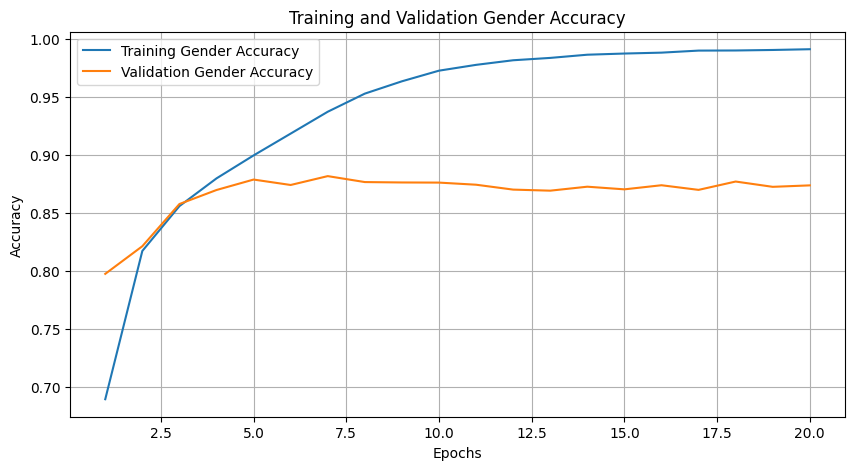

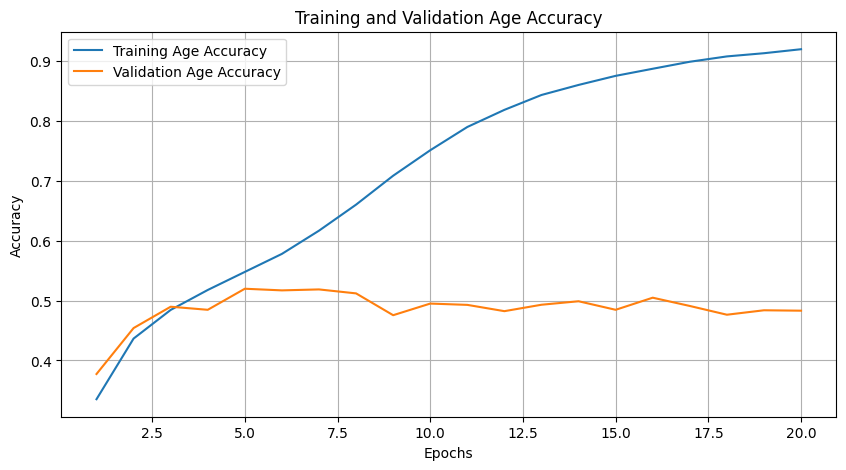

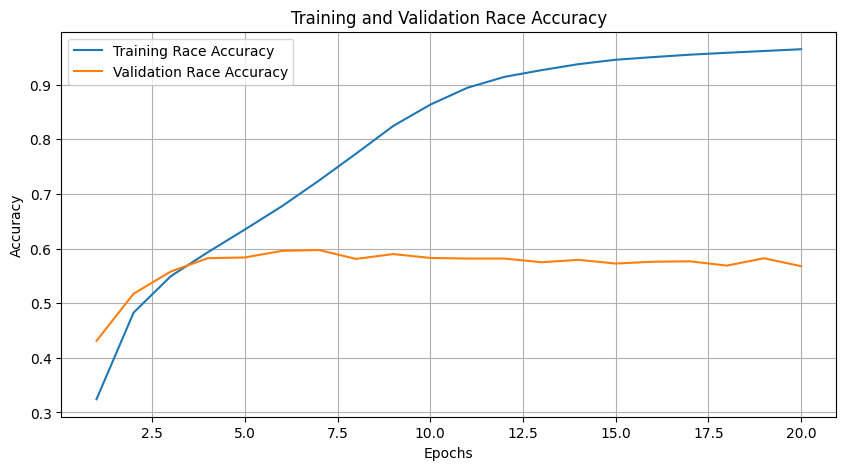

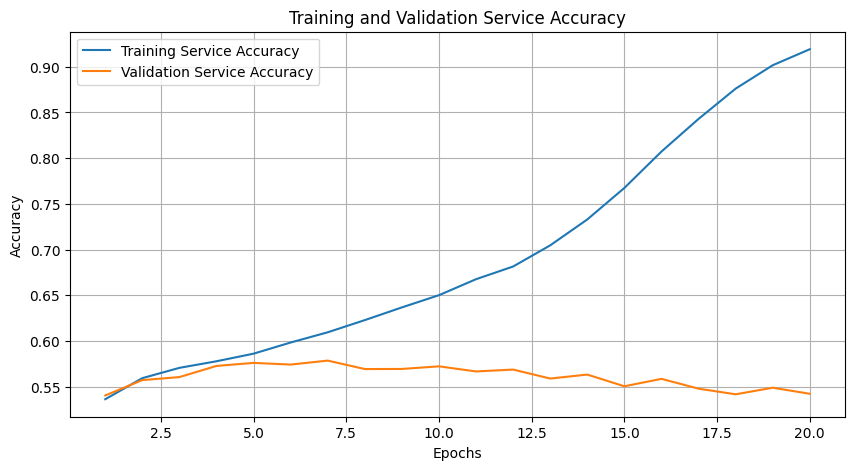

In [45]:
# Plotting training and validation accuracy for gender
plt.figure(figsize=(10, 5))
epochs = range(1, num_epochs + 1)
plt.plot(epochs, train_accuracy_history['gender'], label='Training Gender Accuracy')
plt.plot(epochs, val_accuracy_history['gender'], label='Validation Gender Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Gender Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy for age
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy_history['age'], label='Training Age Accuracy')
plt.plot(epochs, val_accuracy_history['age'], label='Validation Age Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Age Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy for race
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy_history['race'], label='Training Race Accuracy')
plt.plot(epochs, val_accuracy_history['race'], label='Validation Race Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Race Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting training and validation accuracy for service
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy_history['service'], label='Training Service Accuracy')
plt.plot(epochs, val_accuracy_history['service'], label='Validation Service Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Service Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Image Classifier

In [46]:
model = CustomModel(num_gender_classes, num_age_classes, num_race_classes, num_service_test_classes).to('cuda')
model.load_state_dict(torch.load('multi-task.ckpt'))

<All keys matched successfully>

In [47]:
def classify(image):
    image = cv2.resize(image, (32, 32))
    image = image.transpose([2, 0, 1])
    model.eval()
    gender, age, race, service = model(torch.Tensor(image[None, :, :, :]).cuda())
    age = age.argmax(axis=-1).item()
    gender = gender.argmax(axis=-1).item()
    race = race.argmax(axis=-1).item()
    service = service.argmax(axis=-1).item()
    age = num_to_age[age]
    gender = num_to_gender[gender]
    race = num_to_race[race]
    service = num_to_service[service]
    return age, gender, race, service

age: 3-9
gender: Female
race: White
service test: True


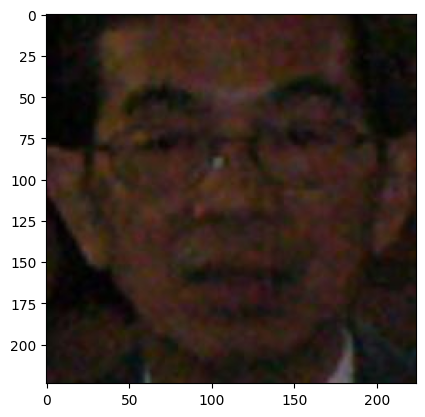

In [105]:
plt.imshow(im)
age, gender, race, service = classify(im)
print('age:', age)
print('gender:', gender)
print('race:', race)
print('service test:', service)

## Evaluation

In [101]:
from sklearn.metrics import classification_report

model.eval()

gender_preds, age_preds, race_preds, service_preds = [], [], [], []
gender_gt, age_gt, race_gt, service_gt = [], [], [], []

with torch.no_grad():
    for val_images, val_labels in tqdm(test_loader):
        val_images = val_images.to('cuda')
        val_labels = val_labels.to('cuda')
        val_gender_output, val_age_output, val_race_output, val_service_output = model(val_images)

        gender_preds.extend(val_gender_output.argmax(dim=-1).cpu().numpy())
        age_preds.extend(val_age_output.argmax(dim=-1).cpu().numpy())
        race_preds.extend(val_race_output.argmax(dim=-1).cpu().numpy())
        service_preds.extend(val_service_output.argmax(dim=-1).cpu().numpy())

        gender_gt.extend(val_labels[:, 0].cpu().numpy())
        age_gt.extend(val_labels[:, 1].cpu().numpy())
        race_gt.extend(val_labels[:, 2].cpu().numpy())
        service_gt.extend(val_labels[:, 3].cpu().numpy())

gender_report = classification_report(gender_gt, gender_preds)
age_report = classification_report(age_gt, age_preds)
race_report = classification_report(race_gt, race_preds)
service_report = classification_report(service_gt, service_preds)

print("\nGender Classification Report:")
print(gender_report)
print("Age Classification Report:")
print(age_report)
print("Race Classification Report:")
print(race_report)
print("Service Classification Report:")
print(service_report)


100%|██████████| 137/137 [00:04<00:00, 29.18it/s]



Gender Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.87      0.87      0.87      1156

    accuracy                           0.86      2191
   macro avg       0.86      0.86      0.86      2191
weighted avg       0.86      0.86      0.86      2191

Age Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.33      0.37       268
           1       0.74      0.79      0.77       279
           2       0.67      0.13      0.22        31
           3       0.45      0.38      0.41       474
           4       0.24      0.14      0.18        63
           5       0.46      0.22      0.30       210
           6       0.40      0.38      0.39       154
           7       0.55      0.81      0.65       661
           8       0.88      0.41      0.56        51

    accuracy                           0.53      2191
   macro avg       

## Confusion Matrix

100%|██████████| 137/137 [00:04<00:00, 28.75it/s]


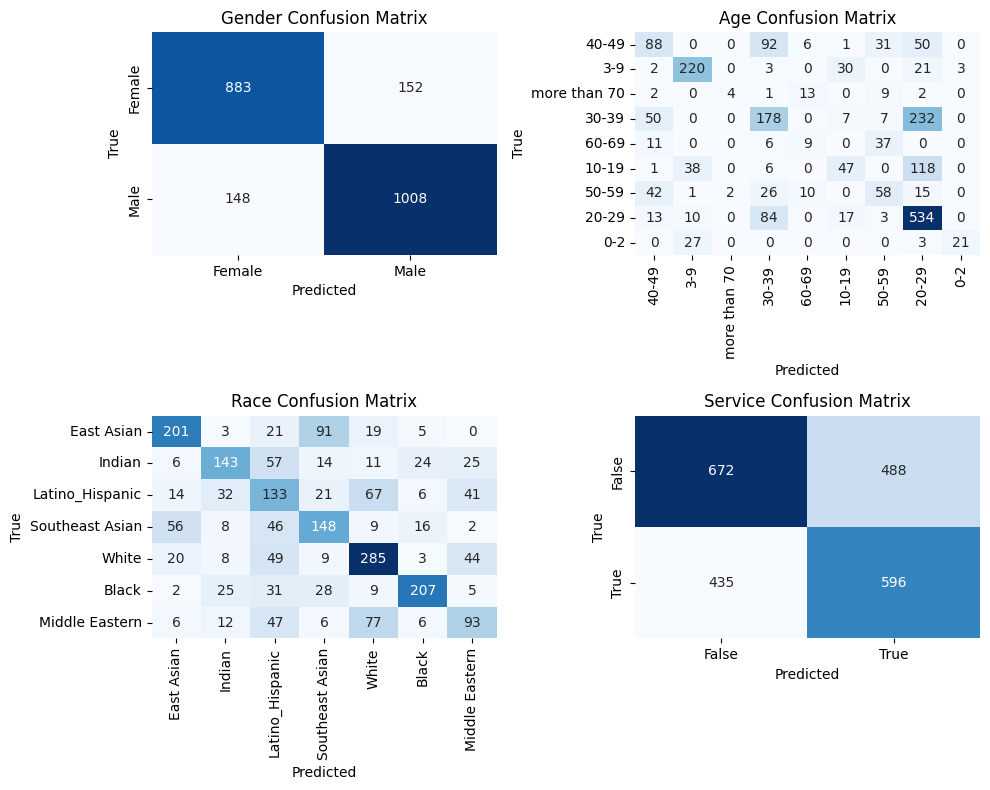

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model.eval()

gender_preds, age_preds, race_preds, service_preds = [], [], [], []
gender_gt, age_gt, race_gt, service_gt = [], [], [], []

with torch.no_grad():
    for val_images, val_labels in tqdm(test_loader):
        val_images = val_images.to('cuda')
        val_labels = val_labels.to('cuda')
        val_gender_output, val_age_output, val_race_output, val_service_output = model(val_images)

        gender_preds.extend(val_gender_output.argmax(dim=-1).cpu().numpy())
        age_preds.extend(val_age_output.argmax(dim=-1).cpu().numpy())
        race_preds.extend(val_race_output.argmax(dim=-1).cpu().numpy())
        service_preds.extend(val_service_output.argmax(dim=-1).cpu().numpy())

        gender_gt.extend(val_labels[:, 0].cpu().numpy())
        age_gt.extend(val_labels[:, 1].cpu().numpy())
        race_gt.extend(val_labels[:, 2].cpu().numpy())
        service_gt.extend(val_labels[:, 3].cpu().numpy())

# Generate confusion matrices
gender_cm = confusion_matrix(gender_gt, gender_preds)
age_cm = confusion_matrix(age_gt, age_preds)
race_cm = confusion_matrix(race_gt, race_preds)
service_cm = confusion_matrix(service_gt, service_preds)

# Plot confusion matrices
plt.figure(figsize=(10, 8))
plt.subplot(221)
sns.heatmap(gender_cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=num_to_gender.values(),yticklabels=num_to_gender.values())
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(222)
# sns.heatmap(age_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=num_to_age.values(),yticklabels=num_to_age.values)
sns.heatmap(age_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=num_to_age.values(), yticklabels=num_to_age.values())
plt.title('Age Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(223)
sns.heatmap(race_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=num_to_race.values(),yticklabels=num_to_race.values())
plt.title('Race Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(224)
sns.heatmap(service_cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=num_to_service.values(), yticklabels=num_to_service.values())
plt.title('Service Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [51]:
num_to_age

{0: '40-49',
 1: '3-9',
 2: 'more than 70',
 3: '30-39',
 4: '60-69',
 5: '10-19',
 6: '50-59',
 7: '20-29',
 8: '0-2'}

In [52]:
num_to_race

{0: 'East Asian',
 1: 'Indian',
 2: 'Latino_Hispanic',
 3: 'Southeast Asian',
 4: 'White',
 5: 'Black',
 6: 'Middle Eastern'}

## Model Bias

According to the classification report and confusion matrix, the model is biased in terms of:

* recall for age ranges 0-2, 40-49, >70 are very low.
* It tends to predict age as 20-29.
* recall for Middle Eastern are very low.

It can be seen that the biases match the occurrence of each class in the dataset. The more a class show in the dataset, the more likely it is predicted in the testing phase.

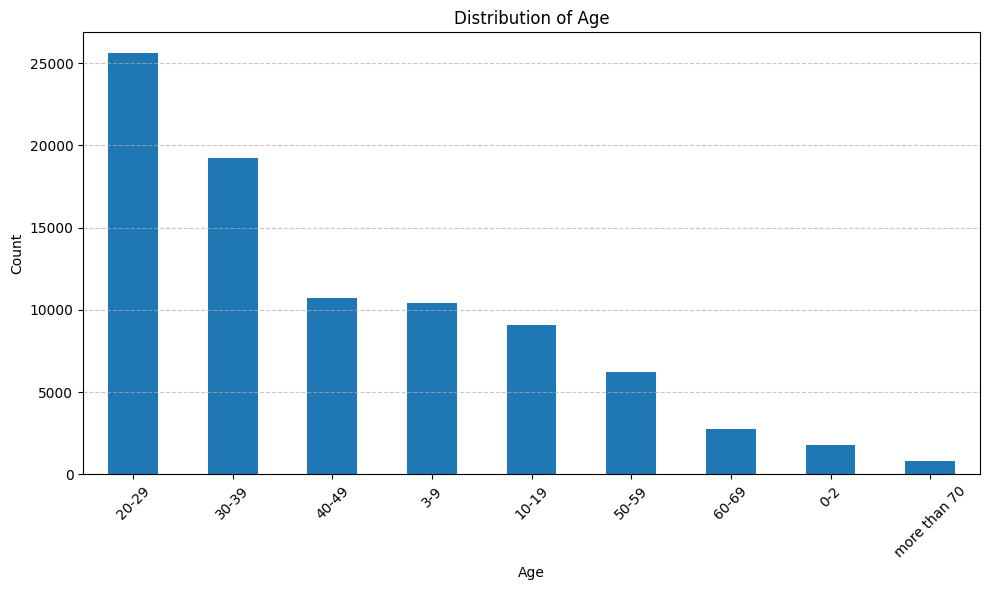

In [53]:
import matplotlib.pyplot as plt

# Assuming train_label['age'].value_counts() returns a pandas Series
age_counts = train_label['age'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

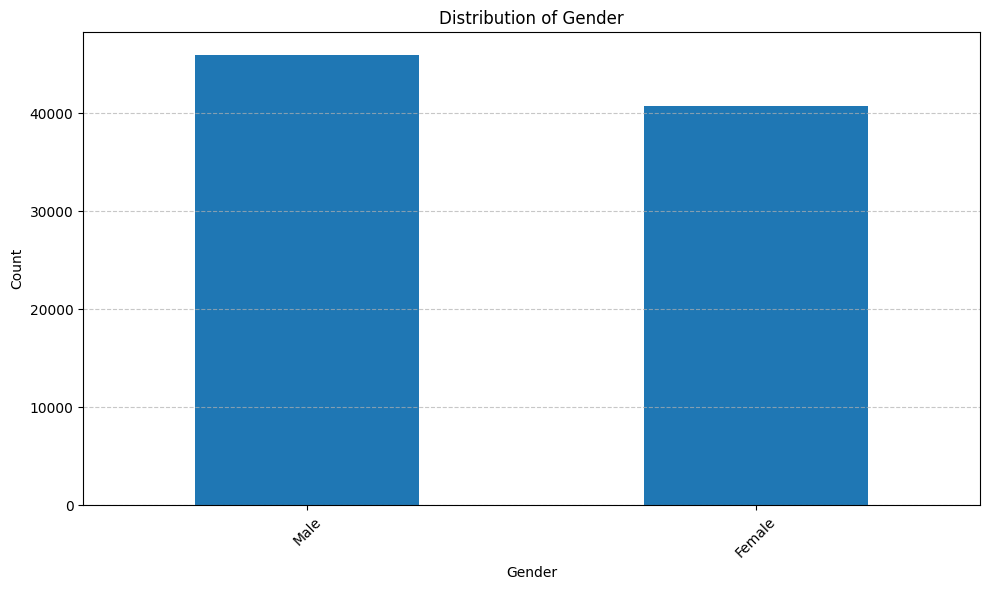

In [102]:
import matplotlib.pyplot as plt

# Assuming train_label['age'].value_counts() returns a pandas Series
age_counts = train_label['gender'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

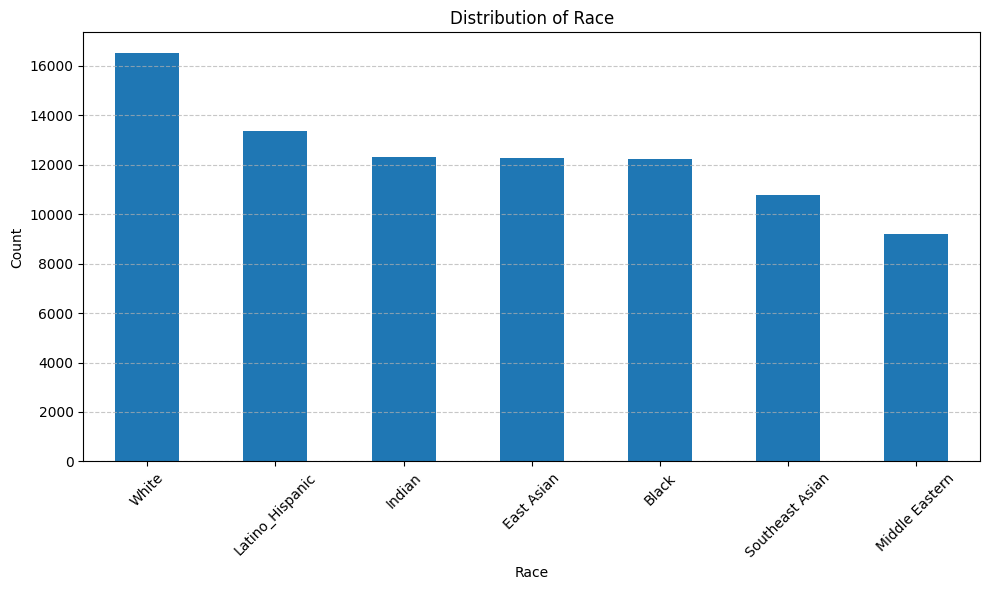

In [62]:
import matplotlib.pyplot as plt

# Assuming train_label['age'].value_counts() returns a pandas Series
age_counts = train_label['race'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Bias Mitigation by loss reweighting

The loss term for each class can be reweighted by the inverse of its occurrence in the dataset.

In [55]:
processed_train_label

,file,age,gender,race,service_test
0,train/1.jpg,6,1,0,1
1,train/2.jpg,3,0,1,0
2,train/3.jpg,1,0,5,0
3,train/4.jpg,7,0,1,1
4,train/5.jpg,7,0,1,1
...,...,...,...,...,...
86739,train/86740.jpg,7,1,1,1
86740,train/86741.jpg,5,1,1,1
86741,train/86742.jpg,2,0,1,1
86742,train/86743.jpg,5,0,5,1


In [56]:
age_counts = processed_train_label['age'].value_counts()
gender_counts = processed_train_label['gender'].value_counts()
race_counts = processed_train_label['race'].value_counts()
service_test_counts = processed_train_label['service_test'].value_counts()

age_weights = 1 / age_counts
gender_weights = 1 / gender_counts
race_weights = 1 / race_counts
service_test_weights = 1 / service_test_counts

processed_train_label['age_weight'] = processed_train_label['age'].map(age_weights)
processed_train_label['gender_weight'] = processed_train_label['gender'].map(gender_weights)
processed_train_label['race_weight'] = processed_train_label['race'].map(race_weights)
processed_train_label['service_test_weight'] = processed_train_label['service_test'].map(service_test_weights)

processed_train_label['age_weight'] /= processed_train_label['age_weight'].mean()
processed_train_label['gender_weight'] /= processed_train_label['gender_weight'].mean()
processed_train_label['race_weight'] /= processed_train_label['race_weight'].mean()
processed_train_label['service_test_weight'] /= processed_train_label['service_test_weight'].mean()

processed_train_label

,file,age,gender,race,service_test,age_weight,gender_weight,race_weight,service_test_weight
0,train/1.jpg,6,1,0,1,1.547563,0.943157,1.008546,1.077512
1,train/2.jpg,3,0,1,0,0.500687,1.064135,1.005926,0.932892
2,train/3.jpg,1,0,5,0,0.926040,1.064135,1.012998,0.932892
3,train/4.jpg,7,0,1,1,0.376522,1.064135,1.005926,1.077512
4,train/5.jpg,7,0,1,1,0.376522,1.064135,1.005926,1.077512
...,...,...,...,...,...,...,...,...,...
86739,train/86740.jpg,7,1,1,1,0.376522,0.943157,1.005926,1.077512
86740,train/86741.jpg,5,1,1,1,1.058796,0.943157,1.005926,1.077512
86741,train/86742.jpg,2,0,1,1,11.446820,1.064135,1.005926,1.077512
86742,train/86743.jpg,5,0,5,1,1.058796,1.064135,1.012998,1.077512


In [57]:
class CustomDebiasedDataset(Dataset):
    def __init__(self, dataframe, directory, transform=None):
        self.dataframe = dataframe
        self.directory = directory
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = self.dataframe.iloc[idx]['file']
        img_path = f"{self.directory}/{img_name}"
        image = Image.open(img_path).convert("RGB")
        labels = torch.tensor(self.dataframe.iloc[idx][['gender', 'age', 'race', 'service_test']].tolist(), dtype=torch.long)
        weights = torch.tensor(self.dataframe.iloc[idx][['gender_weight', 'age_weight', 'race_weight', 'service_test_weight']].tolist())
        if self.transform:
            image = self.transform(image)
        return image, labels, weights

# Load and prepare data
train_dataset = CustomDebiasedDataset(dataframe=processed_train_label, directory='data', transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [58]:
from tqdm import tqdm

debiased_model = CustomModel(num_gender_classes, num_age_classes, num_race_classes, num_service_test_classes).to('cuda')

# Define the loss function
criterion = {
    'gender_output': nn.CrossEntropyLoss(reduction='none'),
    'age_output': nn.CrossEntropyLoss(reduction='none'),
    'race_output': nn.CrossEntropyLoss(reduction='none'),
    'service_output': nn.CrossEntropyLoss(reduction='none')
}

# Define the optimizer
optimizer = optim.Adam(debiased_model.parameters())

# Initialize lists to store training and validation accuracies
train_accuracy_history = {'gender': [], 'age': [], 'race': [], 'service': []}
val_accuracy_history = {'gender': [], 'age': [], 'race': [], 'service': []}
min_val_loss = 1e8

# Train the debiased model
num_epochs = 20
for epoch in range(num_epochs):
    debiased_model.train()
    running_loss = 0.0
    gender_correct, age_correct, race_correct, service_correct = 0, 0, 0, 0
    for images, labels, weights in tqdm(train_loader):
        images = images.to('cuda')
        labels = labels.to('cuda')
        weights = weights.to('cuda')
        optimizer.zero_grad()
        gender_output, age_output, race_output, service_output = debiased_model(images)
        loss = (weights[:, 0] * criterion['gender_output'](gender_output, labels[:, 0])).mean() + \
               (weights[:, 1] * criterion['age_output'](age_output, labels[:, 1])).mean() + \
               (weights[:, 2] * criterion['race_output'](race_output, labels[:, 2])).mean() + \
               (weights[:, 3] * criterion['service_output'](service_output, labels[:, 3])).mean()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        gender = gender_output.argmax(dim=-1)
        age = age_output.argmax(dim=-1)
        race = race_output.argmax(dim=-1)
        service = service_output.argmax(dim=-1)
        gender_correct += (gender == labels[:, 0]).sum()
        age_correct += (age == labels[:, 1]).sum()
        race_correct += (race == labels[:, 2]).sum()
        service_correct += (service == labels[:, 3]).sum()

    epoch_loss = running_loss / len(train_loader.dataset)

    gender_train_accuracy = gender_correct / len(train_loader.dataset)
    age_train_accuracy = age_correct / len(train_loader.dataset)
    race_train_accuracy = race_correct / len(train_loader.dataset)
    service_train_accuracy = service_correct / len(train_loader.dataset)

    train_accuracy_history['gender'].append(gender_train_accuracy.item())
    train_accuracy_history['age'].append(age_train_accuracy.item())
    train_accuracy_history['race'].append(race_train_accuracy.item())
    train_accuracy_history['service'].append(service_train_accuracy.item())

    # Validation phase
    debiased_model.eval()
    with torch.no_grad():
        val_running_loss = 0.0
        gender_correct, age_correct, race_correct, service_correct = 0, 0, 0, 0
        for val_images, val_labels in tqdm(val_loader):
            val_images = val_images.to('cuda')
            val_labels = val_labels.to('cuda')
            val_gender_output, val_age_output, val_race_output, val_service_output = debiased_model(val_images)
            val_loss = criterion['gender_output'](val_gender_output, val_labels[:, 0]).mean() + \
                       criterion['age_output'](val_age_output, val_labels[:, 1]).mean() + \
                       criterion['race_output'](val_race_output, val_labels[:, 2]).mean() + \
                       criterion['service_output'](val_service_output, val_labels[:, 3]).mean()
            val_running_loss += val_loss.item() * val_images.size(0)
            val_gender = val_gender_output.argmax(dim=-1)
            val_age = val_age_output.argmax(dim=-1)
            val_race = val_race_output.argmax(dim=-1)
            val_service = val_service_output.argmax(dim=-1)
            gender_correct += (val_gender == val_labels[:, 0]).sum()
            age_correct += (val_age == val_labels[:, 1]).sum()
            race_correct += (val_race == val_labels[:, 2]).sum()
            service_correct += (val_service == val_labels[:, 3]).sum()

        val_epoch_loss = val_running_loss / len(val_loader.dataset)

    gender_val_accuracy = gender_correct / len(val_loader.dataset)
    age_val_accuracy = age_correct / len(val_loader.dataset)
    race_val_accuracy = race_correct / len(val_loader.dataset)
    service_val_accuracy = service_correct / len(val_loader.dataset)

    val_accuracy_history['gender'].append(gender_val_accuracy.item())
    val_accuracy_history['age'].append(age_val_accuracy.item())
    val_accuracy_history['race'].append(race_val_accuracy.item())
    val_accuracy_history['service'].append(service_val_accuracy.item())

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Val Loss: {val_epoch_loss:.4f}, "
          f"training gender acc: {gender_train_accuracy:.4f}, training age acc: {age_train_accuracy:.4f}, training race acc: {race_train_accuracy:.4f}, "
          f"training service acc: {service_train_accuracy:.4f} "
          f"val gender acc: {gender_val_accuracy:.4f}, val age acc: {age_val_accuracy:.4f}, val race acc: {race_val_accuracy:.4f}, "
          f"val service acc: {service_val_accuracy:.4f}")

    if val_epoch_loss < min_val_loss:
        min_val_loss = val_epoch_loss
        torch.save(debiased_model.state_dict(), 'debiased-multi-task.ckpt')


100%|██████████| 548/548 [00:18<00:00, 30.32it/s]


Epoch 1/20, Loss: 5.1965, Val Loss: 4.7749, training gender acc: 0.6159, training age acc: 0.1518, training race acc: 0.2570, training service acc: 0.5132 val gender acc: 0.7501, val age acc: 0.2012, val race acc: 0.3471, val service acc: 0.5338


100%|██████████| 548/548 [00:18<00:00, 29.58it/s]


Epoch 2/20, Loss: 4.1887, Val Loss: 3.9873, training gender acc: 0.7791, training age acc: 0.2946, training race acc: 0.4189, training service acc: 0.5425 val gender acc: 0.8128, val age acc: 0.3398, val race acc: 0.4680, val service acc: 0.5488


100%|██████████| 548/548 [00:18<00:00, 29.52it/s]


Epoch 3/20, Loss: 3.6814, Val Loss: 3.7591, training gender acc: 0.8270, training age acc: 0.3681, training race acc: 0.4952, training service acc: 0.5549 val gender acc: 0.8437, val age acc: 0.3694, val race acc: 0.5349, val service acc: 0.5520


100%|██████████| 548/548 [00:17<00:00, 30.67it/s]


Epoch 4/20, Loss: 3.3659, Val Loss: 3.5398, training gender acc: 0.8544, training age acc: 0.4093, training race acc: 0.5436, training service acc: 0.5664 val gender acc: 0.8542, val age acc: 0.4290, val race acc: 0.5409, val service acc: 0.5554


100%|██████████| 548/548 [00:18<00:00, 29.67it/s]


Epoch 5/20, Loss: 3.1255, Val Loss: 3.6165, training gender acc: 0.8749, training age acc: 0.4412, training race acc: 0.5824, training service acc: 0.5700 val gender acc: 0.8397, val age acc: 0.3664, val race acc: 0.5580, val service acc: 0.5669


100%|██████████| 548/548 [00:17<00:00, 30.96it/s]


Epoch 6/20, Loss: 2.9211, Val Loss: 3.4278, training gender acc: 0.8885, training age acc: 0.4673, training race acc: 0.6126, training service acc: 0.5776 val gender acc: 0.8679, val age acc: 0.4059, val race acc: 0.5724, val service acc: 0.5634


100%|██████████| 548/548 [00:17<00:00, 30.62it/s]


Epoch 7/20, Loss: 2.7033, Val Loss: 3.3773, training gender acc: 0.9026, training age acc: 0.4940, training race acc: 0.6478, training service acc: 0.5828 val gender acc: 0.8688, val age acc: 0.4320, val race acc: 0.5753, val service acc: 0.5693


100%|██████████| 548/548 [00:17<00:00, 31.25it/s]


Epoch 8/20, Loss: 2.4919, Val Loss: 3.4313, training gender acc: 0.9168, training age acc: 0.5220, training race acc: 0.6831, training service acc: 0.5935 val gender acc: 0.8689, val age acc: 0.4230, val race acc: 0.5898, val service acc: 0.5683


100%|██████████| 548/548 [00:17<00:00, 30.62it/s]


Epoch 9/20, Loss: 2.3006, Val Loss: 3.5719, training gender acc: 0.9315, training age acc: 0.5433, training race acc: 0.7226, training service acc: 0.6035 val gender acc: 0.8710, val age acc: 0.4468, val race acc: 0.5803, val service acc: 0.5755


100%|██████████| 548/548 [00:18<00:00, 30.17it/s]


Epoch 10/20, Loss: 2.0735, Val Loss: 3.6384, training gender acc: 0.9434, training age acc: 0.5749, training race acc: 0.7643, training service acc: 0.6128 val gender acc: 0.8755, val age acc: 0.4671, val race acc: 0.5867, val service acc: 0.5755


100%|██████████| 548/548 [00:17<00:00, 30.86it/s]


Epoch 11/20, Loss: 1.8884, Val Loss: 4.0787, training gender acc: 0.9561, training age acc: 0.6034, training race acc: 0.8017, training service acc: 0.6241 val gender acc: 0.8665, val age acc: 0.4484, val race acc: 0.5821, val service acc: 0.5701


100%|██████████| 548/548 [00:17<00:00, 31.35it/s]


Epoch 12/20, Loss: 1.7037, Val Loss: 4.2310, training gender acc: 0.9645, training age acc: 0.6321, training race acc: 0.8371, training service acc: 0.6387 val gender acc: 0.8663, val age acc: 0.4493, val race acc: 0.5680, val service acc: 0.5699


100%|██████████| 548/548 [00:17<00:00, 30.90it/s]


Epoch 13/20, Loss: 1.5636, Val Loss: 4.4661, training gender acc: 0.9704, training age acc: 0.6535, training race acc: 0.8657, training service acc: 0.6507 val gender acc: 0.8675, val age acc: 0.4577, val race acc: 0.5700, val service acc: 0.5661


100%|██████████| 548/548 [00:18<00:00, 30.07it/s]


Epoch 14/20, Loss: 1.4405, Val Loss: 4.6813, training gender acc: 0.9756, training age acc: 0.6746, training race acc: 0.8895, training service acc: 0.6633 val gender acc: 0.8691, val age acc: 0.4489, val race acc: 0.5666, val service acc: 0.5707


100%|██████████| 548/548 [00:17<00:00, 30.78it/s]


Epoch 15/20, Loss: 1.3348, Val Loss: 4.9904, training gender acc: 0.9794, training age acc: 0.6999, training race acc: 0.9050, training service acc: 0.6801 val gender acc: 0.8674, val age acc: 0.4534, val race acc: 0.5696, val service acc: 0.5708


100%|██████████| 548/548 [00:17<00:00, 30.91it/s]


Epoch 16/20, Loss: 1.2333, Val Loss: 5.1540, training gender acc: 0.9821, training age acc: 0.7165, training race acc: 0.9183, training service acc: 0.7000 val gender acc: 0.8688, val age acc: 0.4639, val race acc: 0.5615, val service acc: 0.5560


100%|██████████| 548/548 [00:17<00:00, 30.70it/s]


Epoch 17/20, Loss: 1.1399, Val Loss: 5.4823, training gender acc: 0.9840, training age acc: 0.7339, training race acc: 0.9293, training service acc: 0.7249 val gender acc: 0.8685, val age acc: 0.4680, val race acc: 0.5625, val service acc: 0.5603


100%|██████████| 548/548 [00:18<00:00, 29.79it/s]


Epoch 18/20, Loss: 1.0566, Val Loss: 5.5145, training gender acc: 0.9852, training age acc: 0.7506, training race acc: 0.9382, training service acc: 0.7522 val gender acc: 0.8675, val age acc: 0.4583, val race acc: 0.5600, val service acc: 0.5551


100%|██████████| 548/548 [00:17<00:00, 30.74it/s]


Epoch 19/20, Loss: 0.9600, Val Loss: 5.8874, training gender acc: 0.9862, training age acc: 0.7662, training race acc: 0.9428, training service acc: 0.7840 val gender acc: 0.8616, val age acc: 0.4653, val race acc: 0.5610, val service acc: 0.5536


100%|██████████| 548/548 [00:18<00:00, 30.36it/s]

Epoch 20/20, Loss: 0.8849, Val Loss: 6.1846, training gender acc: 0.9874, training age acc: 0.7787, training race acc: 0.9491, training service acc: 0.8131 val gender acc: 0.8623, val age acc: 0.4601, val race acc: 0.5640, val service acc: 0.5468


### Evaluation of Debiased Model

In [59]:
debiased_model = CustomModel(num_gender_classes, num_age_classes, num_race_classes, num_service_test_classes).to('cuda')
debiased_model.load_state_dict(torch.load('debiased-multi-task.ckpt'))

<All keys matched successfully>

In [99]:
from sklearn.metrics import classification_report

debiased_model.eval()

gender_preds, age_preds, race_preds, service_preds = [], [], [], []
gender_gt, age_gt, race_gt, service_gt = [], [], [], []

with torch.no_grad():
    for val_images, val_labels in tqdm(test_loader):
        val_images = val_images.to('cuda')
        val_labels = val_labels.to('cuda')
        val_gender_output, val_age_output, val_race_output, val_service_output = debiased_model(val_images)

        gender_preds.extend(val_gender_output.argmax(dim=-1).cpu().numpy())
        age_preds.extend(val_age_output.argmax(dim=-1).cpu().numpy())
        race_preds.extend(val_race_output.argmax(dim=-1).cpu().numpy())
        service_preds.extend(val_service_output.argmax(dim=-1).cpu().numpy())

        gender_gt.extend(val_labels[:, 0].cpu().numpy())
        age_gt.extend(val_labels[:, 1].cpu().numpy())
        race_gt.extend(val_labels[:, 2].cpu().numpy())
        service_gt.extend(val_labels[:, 3].cpu().numpy())

gender_report = classification_report(gender_gt, gender_preds)
age_report = classification_report(age_gt, age_preds)
race_report = classification_report(race_gt, race_preds)
service_report = classification_report(service_gt, service_preds)

# print("Gender Classification Report:")
# print(gender_report)
print("Gender Classification Report:\n")
print(gender_report)
print("Age Classification Report:")
print(age_report)
print("Race Classification Report:")
print(race_report)
print("Service Classification Report:")
print(service_report)

100%|██████████| 137/137 [00:04<00:00, 28.40it/s]


Gender Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.86      0.87      0.86      1156

    accuracy                           0.85      2191
   macro avg       0.85      0.85      0.85      2191
weighted avg       0.85      0.85      0.85      2191

Age Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.31      0.30       268
           1       0.70      0.64      0.67       279
           2       0.54      0.45      0.49        31
           3       0.41      0.43      0.42       474
           4       0.25      0.52      0.34        63
           5       0.29      0.52      0.37       210
           6       0.26      0.31      0.28       154
           7       0.65      0.35      0.45       661
           8       0.53      0.71      0.61        51

    accuracy                           0.43      2191
   macro avg       

### Confusion Matrix of Debiased Model

100%|██████████| 137/137 [00:04<00:00, 28.04it/s]


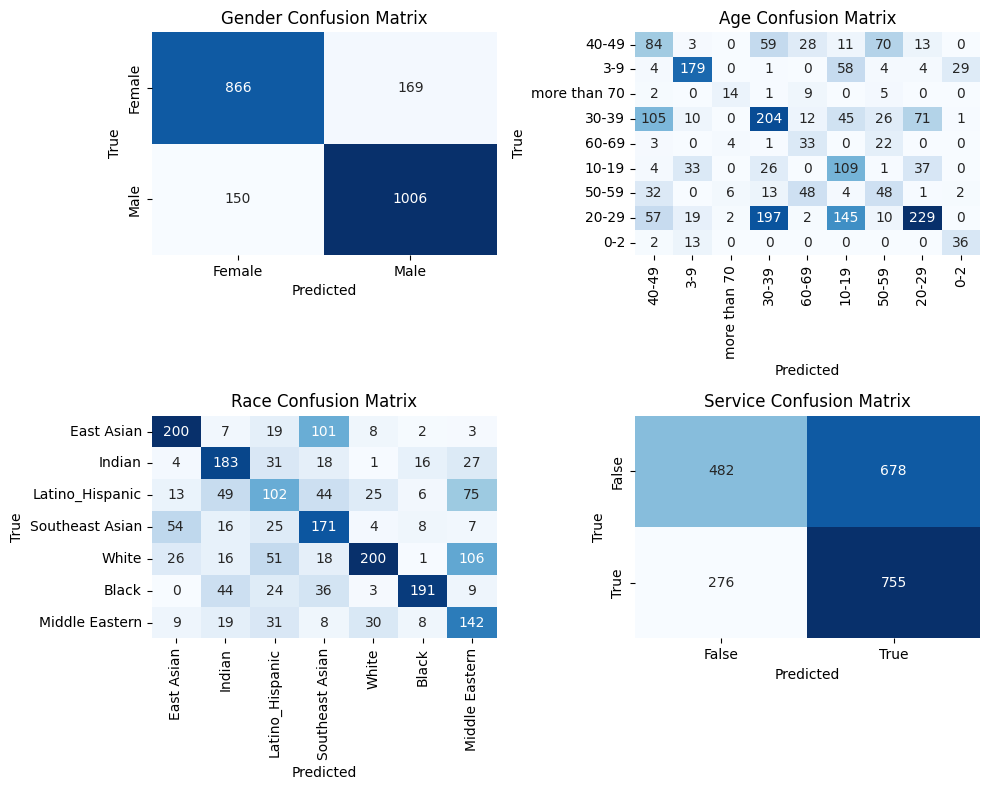

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

debiased_model.eval()

gender_preds, age_preds, race_preds, service_preds = [], [], [], []
gender_gt, age_gt, race_gt, service_gt = [], [], [], []

with torch.no_grad():
    for val_images, val_labels in tqdm(test_loader):
        val_images = val_images.to('cuda')
        val_labels = val_labels.to('cuda')
        val_gender_output, val_age_output, val_race_output, val_service_output = debiased_model(val_images)

        gender_preds.extend(val_gender_output.argmax(dim=-1).cpu().numpy())
        age_preds.extend(val_age_output.argmax(dim=-1).cpu().numpy())
        race_preds.extend(val_race_output.argmax(dim=-1).cpu().numpy())
        service_preds.extend(val_service_output.argmax(dim=-1).cpu().numpy())

        gender_gt.extend(val_labels[:, 0].cpu().numpy())
        age_gt.extend(val_labels[:, 1].cpu().numpy())
        race_gt.extend(val_labels[:, 2].cpu().numpy())
        service_gt.extend(val_labels[:, 3].cpu().numpy())

# Generate confusion matrices
gender_cm = confusion_matrix(gender_gt, gender_preds)
age_cm = confusion_matrix(age_gt, age_preds)
race_cm = confusion_matrix(race_gt, race_preds)
service_cm = confusion_matrix(service_gt, service_preds)

# Plot confusion matrices
plt.figure(figsize=(10, 8))
plt.subplot(221)
sns.heatmap(gender_cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=num_to_gender.values(), yticklabels=num_to_gender.values())
plt.title('Gender Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(222)
sns.heatmap(age_cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=num_to_age.values(), yticklabels=num_to_age.values())
plt.title('Age Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(223)
sns.heatmap(race_cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=num_to_race.values(), yticklabels=num_to_race.values())
plt.title('Race Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(224)
sns.heatmap(service_cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=num_to_service.values(), yticklabels=num_to_service.values())
plt.title('Service Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()

In [95]:
!pwd

/content


In [96]:
!zip -r data.zip data


流式输出内容被截断，只能显示最后 5000 行内容。
  adding: data/val/9117.jpg (deflated 3%)
  adding: data/val/5477.jpg (deflated 3%)
  adding: data/val/5404.jpg (deflated 2%)
  adding: data/val/9199.jpg (deflated 2%)
  adding: data/val/4503.jpg (deflated 3%)
  adding: data/val/9356.jpg (deflated 3%)
  adding: data/val/353.jpg (deflated 3%)
  adding: data/val/694.jpg (deflated 2%)
  adding: data/val/4637.jpg (deflated 3%)
  adding: data/val/1096.jpg (deflated 4%)
  adding: data/val/6947.jpg (deflated 4%)
  adding: data/val/3387.jpg (deflated 2%)
  adding: data/val/8570.jpg (deflated 3%)
  adding: data/val/7099.jpg (deflated 3%)
  adding: data/val/2514.jpg (deflated 3%)
  adding: data/val/5804.jpg (deflated 4%)
  adding: data/val/9495.jpg (deflated 2%)
  adding: data/val/5597.jpg (deflated 5%)
  adding: data/val/602.jpg (deflated 2%)
  adding: data/val/10008.jpg (deflated 4%)
  adding: data/val/6477.jpg (deflated 2%)
  adding: data/val/7300.jpg (deflated 2%)
  adding: data/val/8281.jpg (deflated 2%)
  adding: